<a href="https://colab.research.google.com/github/Bunyodbekkk/classification-around-different-products-about-AI/blob/main/first_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.5.3

In [3]:
import torch
import fastai
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [10]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Fast_food Snack Fruit Desert --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Fast food.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 42179 KB/s, 0 seconds passed
[DOWNLOAD] | Fil

In [11]:
from fastai.vision.all import *
from ipywidgets import widgets
path=Path('train')
fls=get_image_files(path)
fls

(#600) [Path('train/Fruit/5e8458c2415fccbe.jpg'),Path('train/Fruit/0155c190bf8cec4b.jpg'),Path('train/Fruit/30dbfd0caa540e2c.jpg'),Path('train/Fruit/3ad6daa7218bcee9.jpg'),Path('train/Fruit/ec27cac59ce0455b.jpg'),Path('train/Fruit/330651f1095c4535.jpg'),Path('train/Fruit/6f4d630d025887d1.jpg'),Path('train/Fruit/0d8d6cad9d3c0364.jpg'),Path('train/Fruit/097643b3b7534f00.jpg'),Path('train/Fruit/cb092779a4a2e424.jpg')...]

In [12]:
fail= verify_images(path)

zip argument #1 must support iteration


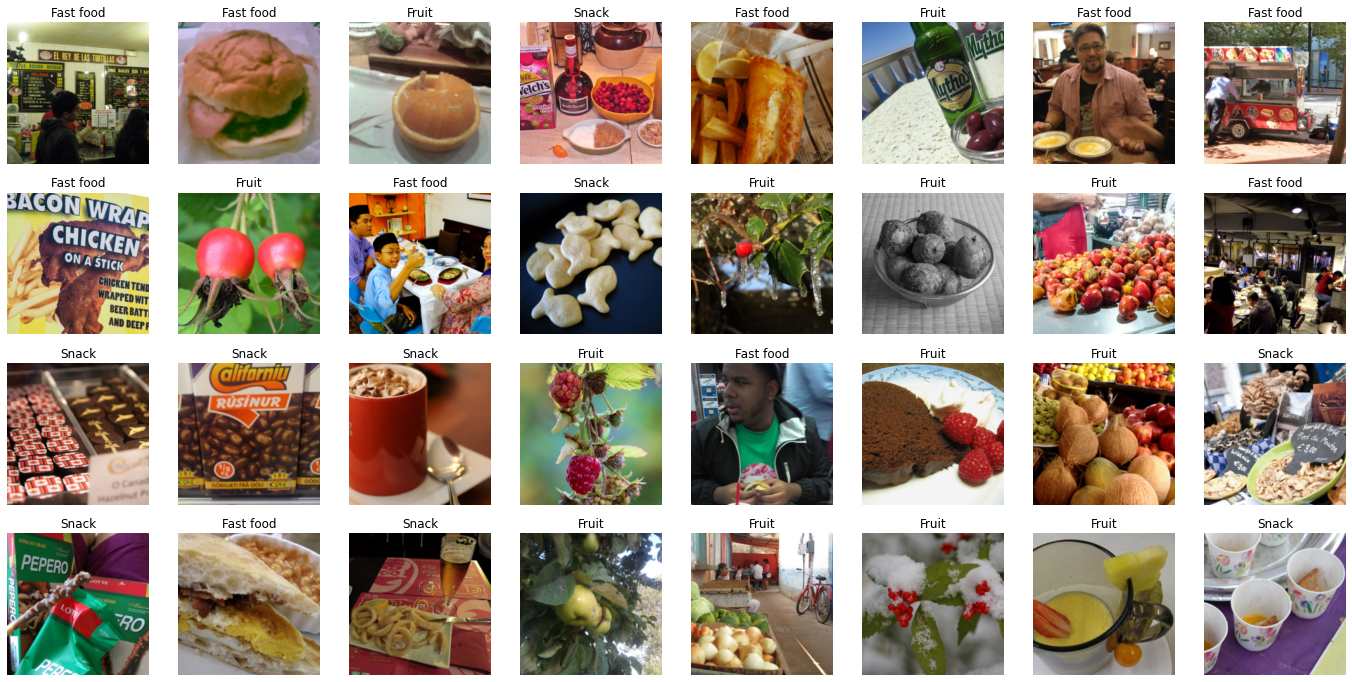

In [13]:
Foods=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=(get_image_files),
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
dls=Foods.dataloaders(path)
dls.train.show_batch(max_n=32,nrows=4)

In [14]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.728160,1.076975,0.625000,00:15


epoch,train_loss,valid_loss,accuracy,time
0,1.045862,0.675873,0.741667,00:14
1,0.856062,0.779291,0.750000,00:14
2,0.684601,0.857074,0.716667,00:15
3,0.575247,0.868885,0.716667,00:15


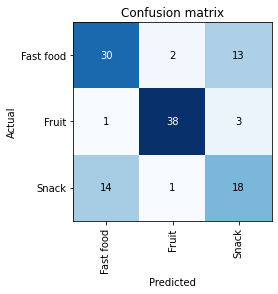

In [15]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

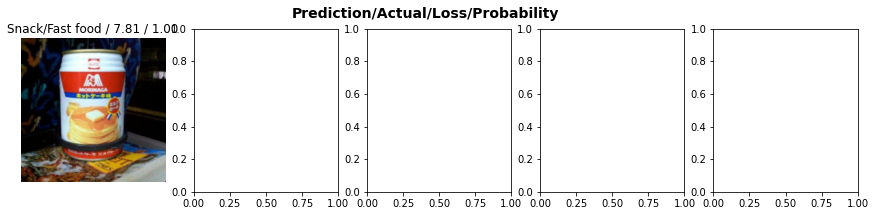

In [16]:
interp.plot_top_losses(5,nrows=1)

In [22]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Fruit
Ehtimollik:98.0%


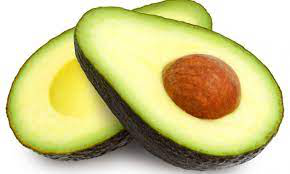

In [23]:
img=PILImage.create(upload.data[-1])
pred,pred_idd,probs=learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Ehtimollik:{probs[pred_idd]*100:.1f}%')
img